<a href="https://colab.research.google.com/github/MattJCR/Red-Neuronal-Keras/blob/master/Red_Neuronal_Keras_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMOS DE APRENDIZAJE SUPERVISADO: ÁRBOLES DE DECISIÓN - Heart Failure**
Clasificación binaria. El objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos (edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si tienen enfermedad o no.

In [ ]:
#@title Importación de librerías
import pandas as pd
import urllib.request
import tempfile
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statistics
import warnings
warnings.filterwarnings('ignore')
# Descargar clase Preprocessing para el tratado del dataset
urllib.request.urlretrieve('https://raw.githubusercontent.com/MattJCR/Algoritmo-Arboles-de-decision/master/Preprocessing.py', 'Preprocessing.py')
from Preprocessing import CleanData as cd

In [ ]:
#@title Obtención del dataset

# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/MattJCR/Algoritmo-Arboles-de-decision/master/dataset/heart.csv'

# Descargar el archivo CSV
response = urllib.request.urlopen(url)

# Crear un archivo temporal para guardar el archivo CSV descargado
temp = tempfile.NamedTemporaryFile()

# Escribir los datos descargados en el archivo temporal
temp.write(response.read())

# Mover el puntero al inicio del archivo
temp.seek(0)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(temp)

# Cerrar el archivo temporal
temp.close()

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
#@title Mostrado de primeras lineas del dataset
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#@title Mostrado de ultimas lineas del dataset
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
#@title Obtener el resumen estadístico del DataFrame
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#@title Limpiado de datos y transformación de categóricos
df = cd.clean(df)
df = cd.transform_categorical_to_numeric(df)
df

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

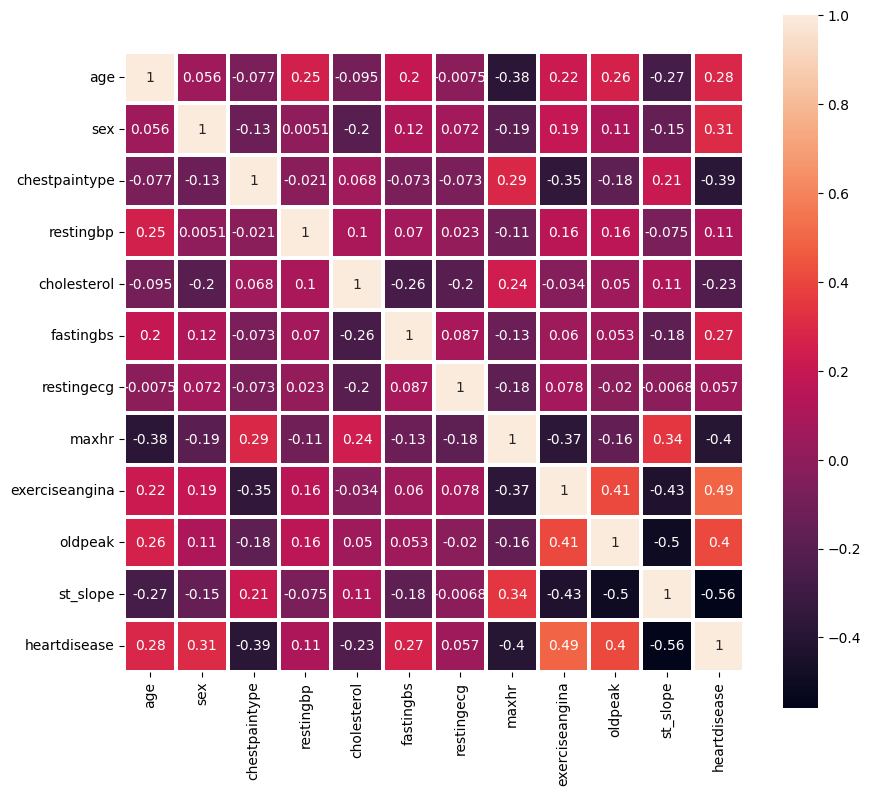

In [ ]:
#@title Mostrar un mapa de calor que indique la correlación entre variables

# Calcular la correlación entre las variables del DataFrame
corr = df.corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(10, 9))
sns.heatmap(corr,square=True,annot=True,linewidths=1.5)
plt


## **Seleccionar las características a tener en cuenta en el estudio**
Para este estudio vamos a seleccionar las propiedades que tengan una relacion con heartdisease por encima de 0.25 y por debajo de -0.25 basandonos en el mapa de calor.

Por tanto vamos a eliminar las siguientes columnas:
* restingbp
* restingecg

In [ ]:
#@title Eliminación de columnas innecesarias y preprocesamiento de datos

# Borrado de columnas
df = df.drop('restingbp',axis=1)
df = df.drop('restingecg',axis=1)

df

,age,sex,chestpaintype,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,1,1,289,0,172,0,0.0,2,0
1,49,0,2,180,0,156,0,1.0,1,1
2,37,1,1,283,0,98,0,0.0,2,0
3,48,0,0,214,0,108,1,1.5,1,1
4,54,1,2,195,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,264,0,132,0,1.2,1,1
914,68,1,0,193,1,141,0,3.4,1,1
915,57,1,0,131,0,115,1,1.2,1,1
916,57,0,1,236,0,174,0,0.0,1,1


In [ ]:
#@title Separar datos entre datos de entrada y etiquetas (resultados)

# Obtenemos la columna heartdisease
df_heartdisease = df['heartdisease']

# Eliminamos la columna heartdisease del dataframe
df = df.drop('heartdisease',axis=1)

In [ ]:
multi_train_labels = np.zeros((len(df_heartdisease), 2), dtype=np.uint8)

for i in range(len(df_heartdisease)):
    multi_train_labels[i, df_heartdisease[i]] = 1
multi_train_labels

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

In [ ]:
#@title Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

x_train,x_test,y_train, y_test = train_test_split(df,multi_train_labels,random_state=1,train_size=0.80)

# **Entrenamiento y predicción**

Numero de entradas: 9


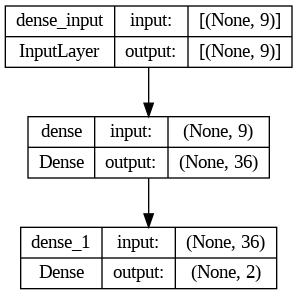

In [ ]:
#@title Implementa una red neuronal para realizar las predicciones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras. initializers import TruncatedNormal 
# Definimos el modelo de Keras
model = Sequential()
input_shape = len(x_train.columns)
init = TruncatedNormal(stddev=0.01, seed=1)
print('Numero de entradas:',input_shape)

model.add(Dense(int(len(x_train.columns)*4), input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(int(len(y_train[0])), activation='softmax', kernel_initializer=init))

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#@title Compilamos el modelo y definimos los callbacks para evitar el sobreentrenamiento
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
import math

# Definir el optimizador
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Definir early stopping
early_stop = EarlyStopping(monitor='accuracy', patience=64, mode='max', verbose=0)

# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.75, patience=32, mode='max', verbose=0)

batch_size=int(math.sqrt(len(x_train)))
print("batch_size:",batch_size)

# Entrenar el modelo con reducción del learning rate
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=batch_size, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

batch_size: 27
Epoch 1/1000
28/28 [==============================] - 1s 13ms/step - loss: 7.7485 - accuracy: 0.5790 - val_loss: 1.0058 - val_accuracy: 0.7446 - lr: 0.0100
Epoch 2/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8877 - accuracy: 0.6785 - val_loss: 0.7153 - val_accuracy: 0.7446 - lr: 0.0100
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.6826 - val_loss: 1.0106 - val_accuracy: 0.5978 - lr: 0.0100
Epoch 4/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.7226 - accuracy: 0.6594 - val_loss: 0.7507 - val_accuracy: 0.6467 - lr: 0.0100
Epoch 5/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.7112 - val_loss: 0.7602 - val_accuracy: 0.5598 - lr: 0.0100
Epoch 6/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7125 - val_loss: 0.5183 - val_accuracy: 0.7772 - lr: 0.0100
Epoch 7/1000
28/28 [==============================] - 

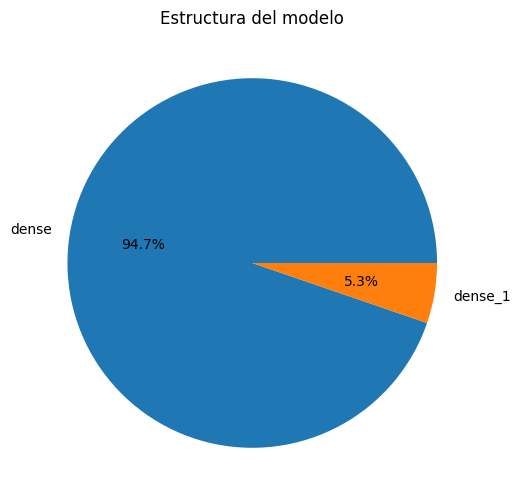

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

In [ ]:
#@title Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

6/6 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9293
Pérdida del modelo en los datos de prueba: 0.2727
Precisión del modelo en los datos de prueba: 0.9293


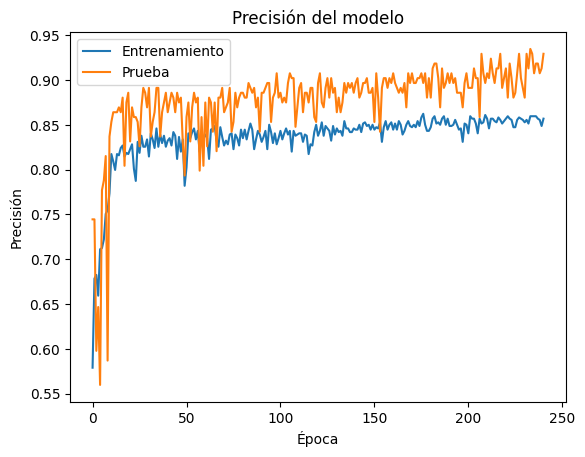

In [ ]:
#@title Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

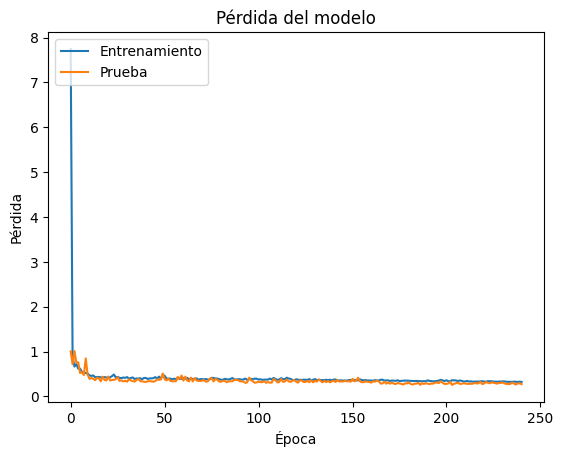

In [ ]:
#@title Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

# **Conclusiones**

En este estudio se ha llevado a cabo un análisis para clasificar si un paciente tiene o no enfermedad del corazón a partir de un conjunto de atributos (edad, sexo, colesterol, etc.). Se ha limpiado y transformado los datos utilizando la clase Preprocessing.py, se ha calculado la correlación entre las variables y se ha seleccionado aquellas características que tienen una relación con heartdisease del corazón superior a 0.25 o inferior a -0.25 basándose en el heatmap.

Luego, se han eliminado algunas columnas innecesarias (restingbp y restingecg) y se han separado los datos en un conjunto de entrenamiento y otro de prueba. 
Se ha entrenado el modelo con el conjunto de entrenamiento y se han realizado predicciones con el conjunto de prueba, utilizando un 80% y un 20% respectivamente.

Una vez seleccionados los parámetros óptimos de la red y encontrado un buen punto para el early_stop y reduce_lr, se ha entrenado el modelo con el conjunto de entrenamiento y evaluar su rendimiento con el conjunto de prueba.

Se ha mostrado el porcentaje de elementos correctamente clasificados, se ha representado gráficamente la clasificación obtenida en una matriz de confusión y se ha comprobado el val_accuracy y el loss obteniendo buenos resultados.

